# Instituto Tecnológico y de Estudios Superiores de Monterrey
Maestría en Inteligencia Artificial Aplicada
Ciencia y analítica de datos 
TC4029.10

# Semana 8- Actividad 7 Regresiones y K-means

Alumna:
**Adriana Fernanda Jiménez Avalos A01087695**

Profesores:	
Profesor titular: Jobish Vallikavungal

Profesor asistente: Juan Miguel Meza Méndez  

Maestría Virtual, 09 Nov 2022

In [195]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# **Regresión**


---



# Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.





Del ejemplo semana 8 TecMty_Regresion_lineal_polinomial.ipynb

Linear Models

In [196]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

Simple Linear Regression

In [197]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

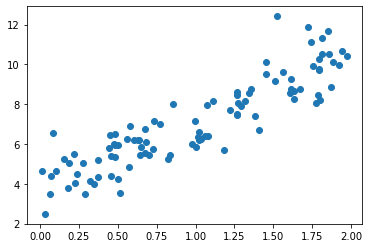

In [198]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [199]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [200]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [201]:
#X_fit[]

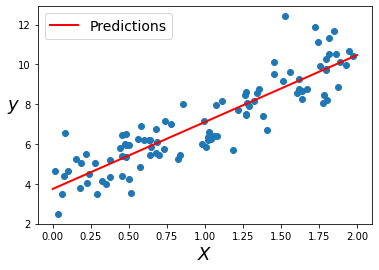

In [202]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [203]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [204]:
X_new.shape

(2, 1)

In [205]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [206]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

In [207]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
597,4.787700,33.916306
700,5.139742,38.849155
632,4.946467,36.827384
586,4.724777,35.449822
602,4.798105,40.280771
154,3.112526,35.130281
65,2.502705,44.442539
745,5.314816,29.963480
478,4.342330,30.460253
67,2.520240,61.879641


In [208]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [209]:
len(X)

1000

In [210]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

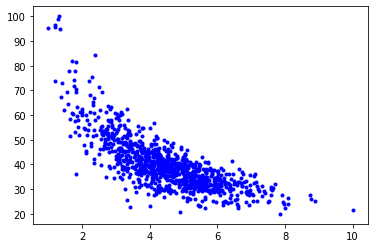

In [211]:
plt.plot(X,y,'b.')

•	Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).


In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)


In [213]:
listaMAE =[] 
listaR2 =[] 

•	Regresión Lineal.
o	Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.



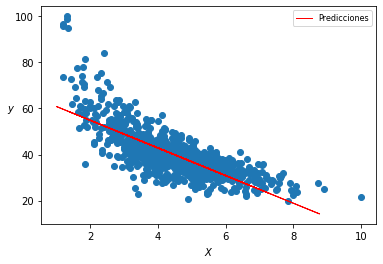

In [214]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
Xreg = X_test  
yreg = lr.predict(Xreg)
plt.scatter(X_train, y_train)
plt.plot(Xreg, yreg, "r-", linewidth=1, label="Predicciones")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=8);

In [215]:
lr.coef_, lr.intercept_

print('El modelo es: Y =', lr.coef_,'X +', lr.intercept_)

mae_regresion_lineal_simple = metrics.mean_absolute_error(y_test,yreg)
listaMAE.append(mae_regresion_lineal_simple)  

r2_regresion_lineal_simple = r2_score(y_test,yreg)
listaR2.append(r2_regresion_lineal_simple)

#Errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,yreg))
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, yreg)))

#R cuadrada
print('R cuadrada_score:', r2_score(y_test,yreg))

El modelo es: Y = [-5.98882699] X + 66.83650741226988
Error Medio Absoluto (MAE): 5.013587781954963
Error Medio Cuadrado (RMSE): 7.108963321847682
R cuadrada_score: 0.6116251549562579


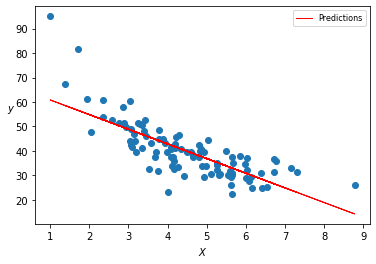

In [216]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

X_para_regresion = np.linspace(0, 10, 100)
y_para_regresion = lr.predict(X_test)

plt.scatter(X_test, y_test) 
plt.plot(X_test, y_para_regresion, "r-", linewidth=1, label="Predictions")
plt.xlabel("$X$", fontsize=10)
plt.ylabel("$y$", rotation=0, fontsize=10)
plt.legend(loc="upper right", fontsize=8);

•	Regresión Polinomial.
o	Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.



In [217]:
pr = PolynomialFeatures(degree=2, include_bias=False) 
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
nr = LinearRegression()
nr.fit(X_train_pr, y_train)
nr.intercept_, nr.coef_

#Errores
cpoli = PolynomialFeatures(degree=2, include_bias=False) 

Xpol = cpoli.fit_transform(X_train)
print("Input",cpoli.n_input_features_)
print("Ouput",cpoli.n_output_features_)
print("Powersn",cpoli.powers_)

regresion_lineal_poli = LinearRegression(fit_intercept=True) 
regresion_lineal_poli.fit(Xpol, y_train)
regresion_lineal_poli.coef_, regresion_lineal_poli.intercept_


Input 1
Ouput 2
Powersn [[1]
 [2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [218]:
Xpol.shape

Xpol_test = cpoli.fit_transform(X_test)
Xpol_test.shape

y_rpoli = regresion_lineal_poli.predict(Xpol_test)
y_rpoli.shape

(100,)

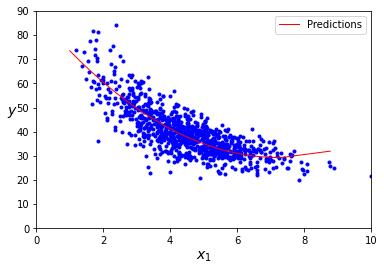

In [219]:
order = np.argsort(X_test.values.ravel()) 

sortedXPoly = X_test.values.ravel()[order] 
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_rpoli[order]


plt.plot(X, y, "b.") 
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=1, label="Predictions")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plt.axis([0, 10, 0, 90]);

In [220]:
mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_rpoli)
listaMAE.append(mae_regresion_lineal_multiple) 

r2_regresion_lineal_multiple = r2_score(y_test,y_rpoli)
listaR2.append(r2_regresion_lineal_multiple)

metrica_mae = metrics.mean_absolute_error(y_test, y_rpoli)
r2Score = r2_score(y_test, y_rpoli)

print('Error medio Absoluto (MAE):', metrica_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_rpoli)))
print('r2_score',r2Score)

Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068423
r2_score 0.7385501224942537


•	Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.



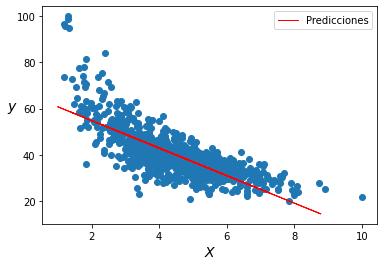

In [221]:
mi_ridge = Ridge(alpha=5.0,fit_intercept=True) 
mi_ridge.fit(X_train, y_train)
Xrid = X_test  
yrid = mi_ridge.predict(Xrid)
plt.scatter(X_train, y_train)
plt.plot(Xrid, yrid, "r-", linewidth=1, label="Predicciones")
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=10);

In [222]:
mae_ridge = metrics.mean_absolute_error(y_test,yrid)
listaMAE.append(mae_ridge)  

r2_ridge= r2_score(y_test,yrid)
listaR2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, yrid)
r2Score = r2_score(y_test, yrid)
print('Error medio Absoluto (MAE):', metrica_mae_ridge)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yrid)))
print('R square_score',r2Score)


print('El modelo es: Y =', mi_ridge.coef_,'X +', mi_ridge.intercept_)

Error medio Absoluto (MAE): 5.0162057389928325
Root Mean Squared Error: 7.1111119498200965
R square_score 0.6113903530239646
El modelo es: Y = [-5.97003397] X + 66.75243237759665


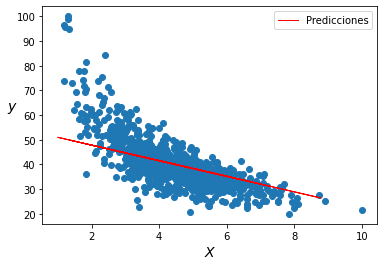

In [223]:
mi_lasso = Lasso(alpha=5.0,fit_intercept=True) 
mi_lasso.fit(X_train, y_train)
Xlas = X_test  
ylas = mi_lasso.predict(Xrid)
plt.scatter(X_train, y_train)
plt.plot(Xlas, ylas, "r-", linewidth=1, label="Predicciones")
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=10);

In [224]:
mae_lasso = metrics.mean_absolute_error(y_test,ylas)
listaMAE.append(mae_lasso)

r2_lasso= r2_score(y_test,ylas)
listaR2.append(r2_lasso)


metrica_mae_lasso = metrics.mean_absolute_error(y_test, ylas)
r2Score = r2_score(y_test, ylas)
print('Error medio Absoluto (MAE):', metrica_mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ylas)))
print('r2_score',r2Score)

print('El modelo es: Y =', mi_lasso.coef_,'X +', mi_lasso.intercept_)

Error medio Absoluto (MAE): 5.681207654677401
Root Mean Squared Error: 8.409660991642687
r2_score 0.456505036516648
El modelo es: Y = [-3.15572458] X + 54.16195119377413


•	Finalmente grafica :
o	MAE (de los cuatro métodos)
o	R2 (de los cuatro métodos)



In [225]:
print(listaMAE)


[5.013587781954963, 4.3833025759681075, 5.0162057389928325, 5.681207654677401]


In [226]:
print(listaR2)

[0.6116251549562579, 0.7385501224942537, 0.6113903530239646, 0.456505036516648]


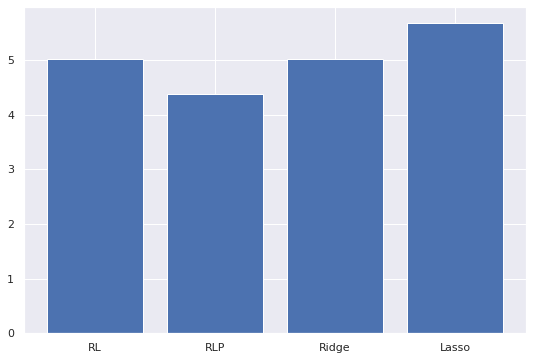

In [230]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, listaMAE)
plt.show()

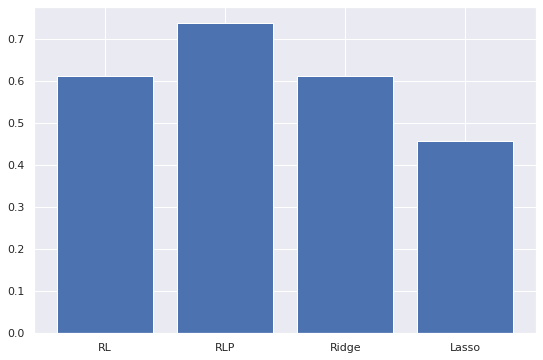

In [231]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, listaR2)
plt.show()

•	Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

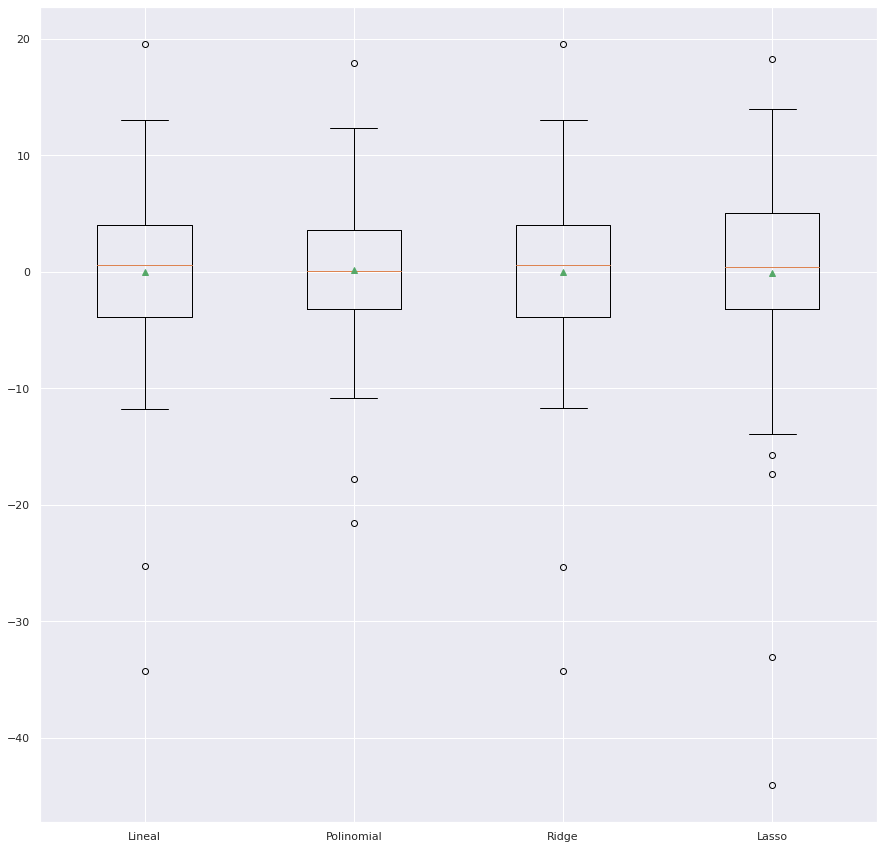

In [236]:
residuo_regresion_simple=y_para_regresion - y_test
residuo_regresion_poliforme= y_rpoli - y_test
residuo_ridge=yrid - y_test
residuo_lasso=ylas - y_test
lista_residuos= [residuo_regresion_simple,residuo_regresion_poliforme,residuo_ridge,residuo_lasso]
nombres=list()
nombres.append('Lineal')
nombres.append('Polinomial')
nombres.append('Ridge')
nombres.append('Lasso')

sns.set(rc={'figure.figsize':(15,15)})

plt.boxplot(lista_residuos, labels=nombres, showmeans=True)
plt.show()

# Conclusiones

El metodo que le conviene usar a la empresa es el polinomial ya que su caja de bigotes demuestra que hay un equilibrio entre el cuartil 1 y el cuartil 3, y la media esta justo en medio de Q1 y Q3. Tambien muestra que sus outliers no estan tan alejados de la mayoria de la informacion.

Tambien podemos notar que el resultado de R square para el polinomio nos da 0.73 que es considerado un buen numero. Recordemos que el R square nos dice que tan bien ajuste se tiene del modelo. Estos resultados nos dicen que el metodo polinomial es el que mejor ajuste tiene, ya que explica todas las variables de respuesta de los datos alrededor de su media.

Y al observar su MAE de 4, que es la menor a comparacion de los otros modelo nos dice que es buena pues se acerca a 0. El MAE entre mas bajo mejor ya que nos dice que el modelo es mas preciso.

# Ejercicio 2. Regresión múltiple.

Encuentra el mejor regresor para los datos de las casas:

•	Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).



•	Regresión Múltiple Lineal.
o	Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.



•	Regresión Múltiple Polinomial.
o	Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.



•	Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.


•	Finalmente gráfica :
o	MAE (de los cuatro métodos)
o	R2 (de los cuatro métodos)



•	Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?



In [237]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14905,585000095,20141216T000000,625000.0,3,2.50,2180,5000,1.0,0,0,...,8,1240,940,1977,0,98116,47.5828,-122.396,2000,5000
3470,2313900165,20140730T000000,479200.0,3,2.00,1510,3750,1.5,0,0,...,7,1510,0,1928,0,98116,47.5737,-122.383,1500,5000
16816,8029500380,20140731T000000,305000.0,3,2.00,1830,10873,1.0,0,0,...,8,1830,0,1989,0,98023,47.3066,-122.394,2490,8976
7660,6675500035,20140613T000000,435000.0,3,1.75,1500,8173,1.0,0,0,...,7,1500,0,1997,0,98034,47.7293,-122.227,1970,8173
12063,1139000135,20141009T000000,440000.0,4,1.00,1480,7560,1.5,0,0,...,7,1480,0,1940,0,98177,47.7079,-122.358,1480,7560
18028,8731901910,20140616T000000,285500.0,4,1.75,1960,7950,1.0,0,0,...,8,1960,0,1967,0,98023,47.3109,-122.377,1960,8400
4003,6209000165,20140724T000000,247500.0,4,1.75,2290,7765,1.0,0,0,...,6,2290,0,1936,1953,98146,47.4997,-122.353,1240,8215
7682,7254200040,20150316T000000,345000.0,2,1.00,960,2700,1.0,0,0,...,6,780,180,1904,0,98144,47.6013,-122.299,1400,3000
8413,2021200530,20150225T000000,1110000.0,4,2.75,3090,6600,1.0,0,2,...,9,1800,1290,1956,0,98199,47.6339,-122.396,2380,5000
1383,3902300350,20140806T000000,606000.0,4,2.25,2390,8858,1.0,0,0,...,8,1740,650,1979,0,98033,47.6925,-122.184,2240,8858


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [239]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [240]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

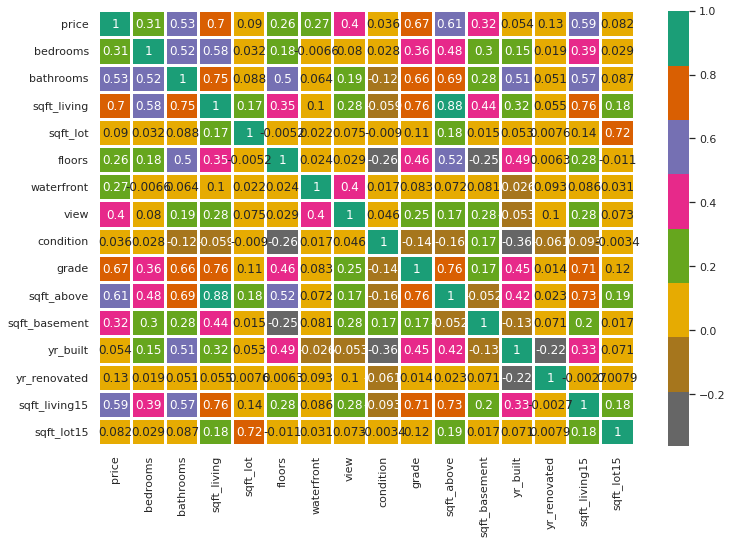

In [241]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [242]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


# **K-means**


---



Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [244]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 8.2 MB/s 
     |████████████████████████████████| 1.0 MB 61.4 MB/s 
     |████████████████████████████████| 1.7 MB 49.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 55.3 MB/s 
     |████████████████████████████████| 6.3 MB 34.8 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=5037225bafe3f34db5169c92c74831ca827b935bf585d779e43b3774f260719c
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=ddb6787aaf8b6497a5b22d4e4c7f1aa6efb6273f10c8915738c7a32e30e39b50
  Stored in directory: /root/.

In [245]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [246]:
#importa base de datos
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url) 

In [247]:
#explora datos
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [249]:
latlong=df[["latitude","longitude"]]

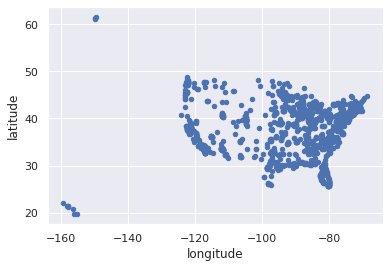

In [250]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [251]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


In [252]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [253]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [254]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [255]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [256]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

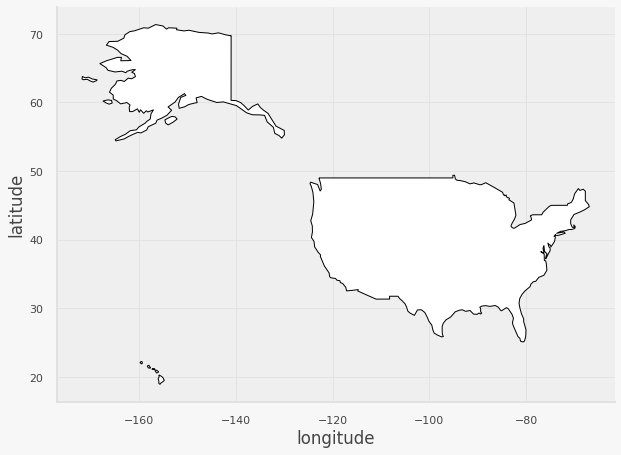

In [257]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

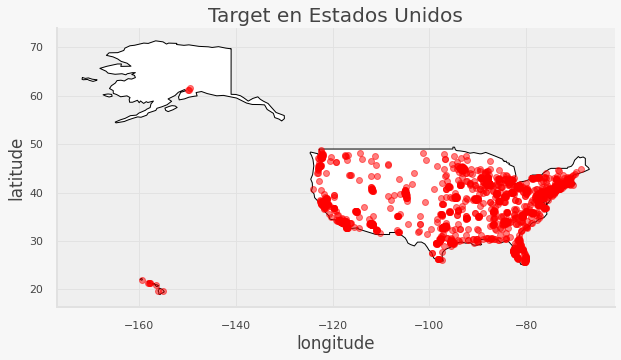

In [258]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

# Ejercicio 3

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

Encuentra el numero ideal de almacenes, justifica tu respuesta:

•	Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
•	¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

Justificacion

El numero ideal de almacenes que seleccione es 3 en total, ya que con la grafica elbow curve es un metodo que se utiliza para analisis de cluster. Funciona de manera que determina el numero de cluster de un set de datos. En este caso se necesita saber cuales son los almacenes mas cercanos entre ellos, para poder asi tener eficiencia en costos de logistica y disminucion de costos. Es por eso que el usar la grafica elbow es buena para analisis de este tipo de informacion. Al tener identificada la curva pico 'o el codo' es donde se puede conocer el numero de cluster total a elegir, en este caso 3.


0	1	Coordinates
0	-98.266337	34.420357	POINT (-98.26634 34.42036)
1	-75.625969	40.337907	POINT (-75.62597 40.33791)
2	-119.176343	37.579774	POINT (-119.17634 37.57977)
3	-82.960678	31.139056	POINT (-82.96068 31.13906)
4	-88.407272	41.804289	POINT (-88.40727 41.80429


Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

•	¿qué librerías nos pueden ayudar a graficar este tipo de datos?
libreria sklearn con Kmeans y geopandas

•	¿Consideras importante que se grafique en un mapa?, ¿por qué?
Si, pues da mas ayuda visual al poder representar los diferentes cluster y su locacion. 


In [259]:
from sklearn.cluster import KMeans

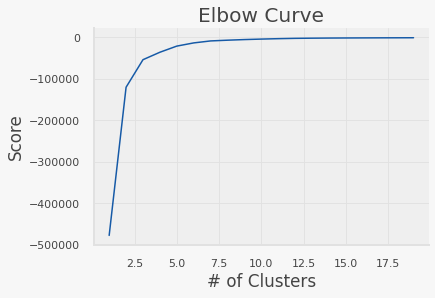

In [291]:
K_clus = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clus] 

Y_axis = latlong[['longitude']]
X_axis = latlong[['latitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]



plt.plot(K_clus, score)
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [292]:
kmeans = KMeans(n_clusters = 3, init ='k-means++') 

kmeans.fit(latlong[latlong.columns[0:2]])

labels = kmeans.labels_
labels

array([2, 2, 2, ..., 0, 2, 0], dtype=int32)

In [293]:
X = df[["longitude","latitude"]]

kmeans = KMeans(n_clusters=3).fit(X) 
cent = kmeans.cluster_centers_ 
labels = kmeans.predict(X) 

CC = kmeans.cluster_centers_

CCdf = pd.DataFrame(CC) 
CCdf["Coordinates"] = list(zip(CCdf[0], CCdf[1]))
CCdf["Coordinates"] = CCdf["Coordinates"].apply(Point) 


gdf_CC = gpd.GeoDataFrame(CCdf, geometry="Coordinates") 
gdf_CC

,0,1,Coordinates
0,-78.569908,37.789554,POINT (-78.56991 37.78955)
1,-118.624473,37.487342,POINT (-118.62447 37.48734)
2,-93.327172,37.980063,POINT (-93.32717 37.98006)


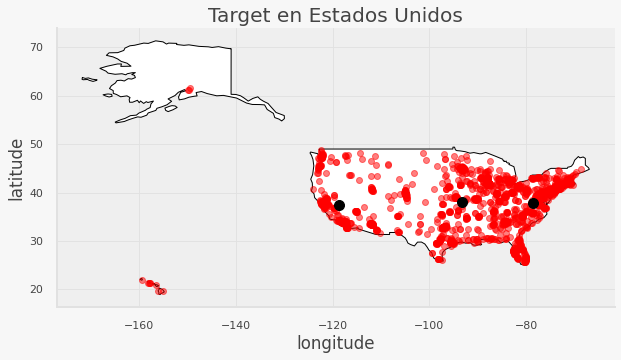

In [294]:
fig, gax = plt.subplots(figsize=(10,8))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white') 


gdf.plot(ax=gax, color='red', alpha = 0.5) 
gdf_CC.plot(ax=gax, color='black', alpha = 1, markersize = 100) 


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()